# Project 3
## Thomas Clark
### Fall2021, CPSC483-01
***
In this project you will use scikit-learn, which is a higher-level machine learning library that works with NumPy data, and Pandas, a library that makes it easier to manipulate data. You will explore a variety of classification algorithms, and compare their performance on a “real-world” dataset, which will introduce its own set of challenges.
***
### 1. Download bank-additional.zip and extract its contents. Use pandas.read_csv() to load and examine the dataset from bank-additional-full.csv, and pandas.DataFrame.head() to examine its contents.
***

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

banknames = pd.read_csv('bank-additional-full.csv', delimiter = ';')
banknames.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


***
### 2. Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Since the dataset is large, use 90% of the original data as a training set, and 10% for testing. To make sure that your results are reproducible, pass the keyword argument random_state=(2021-10-25).
***

In [47]:
from sklearn.model_selection import train_test_split

training, testing = train_test_split(banknames, test_size = .1, random_state=(2021-10-25))

print(len(training), "Items in training set")
print(len(testing), " Items in testing set")
print((len(testing)+len(training)), "Items total")

37069 Items in training set
4119  Items in testing set
41188 Items total


***
### 3. Your training and test sets will need some significant preprocessing before they can be used: <br><br> a) Per the description in bank-additional-names.txt, the duration “should be discarded if the intention is to have a realistic predictive model.” <br><br> b) The feature y is the target response; set this aside for use in training and testing, then drop it from your features.
***

In [48]:
yTrain = training.get('y').replace('no', 0).replace('yes',1)
yTest = testing.get('y').replace('no', 0).replace('yes',1)

training.drop(columns = ['duration', 'y'], inplace = True)
testing.drop(columns = ['duration', 'y'], inplace = True)

#training.head()

***
### 4. First, let’s see if we can determine whether a client will subscribe to a term deposit based on what we know about them. Let’s take as input features the variables described as “bank client data” in bank-additional-names.txt.
***

In [49]:
def catEncode(dataSet):

    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('job'), prefix = 'job', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('marital'), prefix = 'marital', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('education'), prefix = 'education', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('default'), prefix = 'default', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('housing'), prefix = 'housing', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('loan'), prefix = 'loan', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('contact'), prefix = 'contact', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('month'), prefix = 'month', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('day_of_week'), prefix = 'day_of_week', drop_first = True)], axis = 1, sort = False, join = 'inner')
    dataSet = pd.concat([dataSet, pd.get_dummies(dataSet.get('poutcome'), prefix = 'poutcome', drop_first = True)], axis = 1, sort = False, join = 'inner')
        
    dataSet.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' ], inplace = True)
    dataSet = dataSet.abs()
    
    return dataSet
    
training = catEncode(training)
testing = catEncode(testing)

training.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
22975,56,5,999,0,1.4,93.444,36.1,4.965,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
14746,26,1,999,0,1.4,93.918,42.7,4.957,5228.1,0,...,0,0,0,0,0,0,0,1,1,0
12505,38,1,999,0,1.4,93.918,42.7,4.960,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
6801,33,2,999,0,1.1,93.994,36.4,4.857,5191.0,0,...,1,0,0,0,0,0,0,1,1,0
18389,29,3,999,0,1.4,93.918,42.7,4.968,5228.1,0,...,0,0,0,0,0,1,0,0,1,0


***
### 5. Use scikit-learn to fit a Categorical Naive Bayes classifier to the training set, then score it on both the training and test sets. How accurate is the classifier?
***

In [50]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()

cnb.fit(training, yTrain)

print("Training Score: ", cnb.score(training, yTrain))
print("Test Score: ", cnb.score(testing, yTest))

Training Score:  0.8688661684965875
Test Score:  0.8635591162903618


We see that the Categorical Naive Bayes classifier is returning ~86% accuracy on both the training and test sets.
***
### 6. Take another look at the data you used for the previous experiment. Most of the data is categorical, but age is a quantitative predictor. Categorical Naive Bayes assumes that each value of the age variable is a separate category. How many categories are there? Is this reasonable?
***

In [51]:
print(banknames['age'].nunique(), "different catagories for age")

78 different catagories for age


This is not reasonable as the difference in one year may have different outcomes that affect the classifier more than they would if this data was aggregated into larger chunks.
***
### 7. Try splitting ages into bins, one per decade. Verify the number of bins, then re-train your classifier the bins instead of the original age value. Does its performance change?
***

In [52]:
training2 = training
testing2 = testing

training2['age'] = training2['age'].floordiv(10) #divide by 10 and chop off the decimal - sorted by decade
testing2['age'] = testing2['age'].floordiv(10)

print((banknames['age'].floordiv(10)).nunique(), "different catagories for age\n")

cnb.fit(training2, yTrain)

print("Training Score: ", cnb.score(training2, yTrain))
print("Test Score: ", cnb.score(testing2, yTest))

9 different catagories for age

Training Score:  0.8689740753729531
Test Score:  0.8633163389172129


While the classifiers performance did slightly change, it was not in any significant amount. Decade age of the individual has similar weight to just the age of the individual.
***
### 8. Repeat experiment (5) (i.e. with the original age values) with a KNN classifier. How do the results compare?
***

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(training, yTrain)

print("Training Score: ", knn.score(training, yTrain))
print("Test Score: ", knn.score(testing, yTest))

Training Score:  0.9247889071731096
Test Score:  0.8871085214857976


These results are only marginally better than what was achieved with the categorical naiave Bayes classifier, though in testing we achive almost the same result as the Bayes classifier.
***
### 9. How many values in the test set have response 0, and how many have response 1? What would be the score if we simply assumed that no customer ever subscribed to the product?
***

In [55]:
counts = (yTrain.value_counts() + yTest.value_counts())

print(counts)

print("\nPercent of non subscribers: ", counts[0]/counts.sum())

0    36548
1     4640
Name: y, dtype: int64

Percent of non subscribers:  0.8873458288821987


If we were just to blindly predict no for each test we would actually test better than our classifiers and even outpreform the training for the Bayes classifiers.
***
### 10. Use numpy.zeros_like() to create a target vector representing the output of the “dumb” classifier described in the previous experiment, then create a confusion matrix and find its AUC.
***

[[TN,FP],[FN,TP]]
 [[36548     0]
 [ 4640     0]]
ROC Area under curve:  0.5


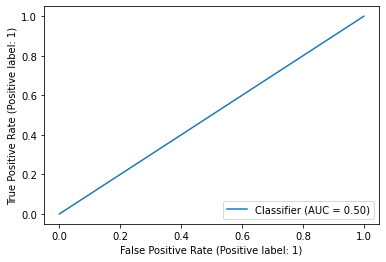

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

fullTarget = pd.concat([yTrain, yTest])
dumbTarget = np.zeros_like(fullTarget)

print("[[TN,FP],[FN,TP]]\n",
confusion_matrix(fullTarget, dumbTarget))
print("ROC Area under curve: ", roc_auc_score(fullTarget, dumbTarget))
RocCurveDisplay.from_predictions(fullTarget, dumbTarget)

***
### 11. Create confusion matrices and compute the AUC for each of the classifiers in experiments (7) and (8). How well are these classifiers actually performing?
***

Categorical Naive Bayes:
[[TN,FP],[FN,TP]]
 [[31490  5058]
 [ 3978   662]]
ROC Area under curve:  0.5021395340279953


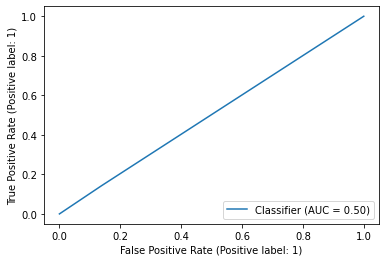


Nearest Neighbor:
[[TN,FP],[FN,TP]]
 [[35174  1374]
 [ 4467   173]]
ROC Area under curve:  0.49984504317421025


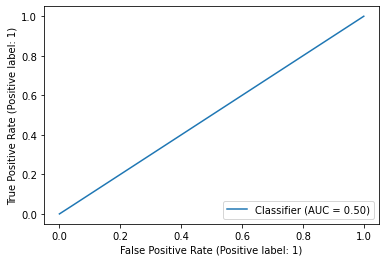

In [63]:
cnbScore = cnb.predict(pd.concat([testing, training]))
knnScore = knn.predict(pd.concat([testing, training]))

print("Categorical Naive Bayes:")
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(fullTarget, cnbScore))
print("ROC Area under curve: ", roc_auc_score(fullTarget, cnbScore))
RocCurveDisplay.from_predictions(fullTarget, cnbScore)
plt.show()

print("\nNearest Neighbor:")
print("[[TN,FP],[FN,TP]]\n", confusion_matrix(fullTarget, knnScore))
print("ROC Area under curve: ", roc_auc_score(fullTarget, knnScore))
RocCurveDisplay.from_predictions(fullTarget, knnScore)

***
### 12. It should be clear from your results that we are dealing with imbalanced data. One of the easiest ways to deal with an unbalanced dataset is random oversampling.
***